In [1]:
from pysr.julia_helpers import init_julia
from julia.tools import redirect_output_streams

In [1]:
import sympy
import numpy as np
from matplotlib import pyplot as plt
from pysr import PySRRegressor
import torch
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import DataLoader, TensorDataset
from accelerate import Accelerator
from sklearn.model_selection import train_test_split

$$
2.5382\cos(x_3) + x_0^2 - 2
$$

In [2]:
# Dataset
np.random.seed(0)
X = 2 * np.random.randn(100, 5)
y = 2.5382 * np.cos(X[:, 3]) + X[:, 0] ** 2 - 2

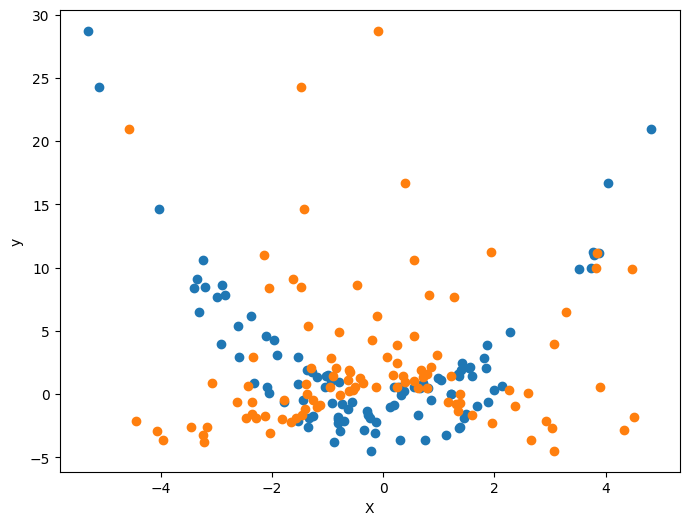

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], y)
plt.scatter(X[:, 3], y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [4]:
default_pysr_params = dict(
    populations=30,
    procs=4,
    model_selection="best",
)

In [5]:
# Learn equations
model = PySRRegressor(
    niterations=30,
    binary_operators=["plus", "mult"],
    unary_operators=["cos", "exp", "sin"],
    **default_pysr_params
)

model.fit(X, y)

/home/xteca/Documents/Project/Machine_Learning/MITP2023/SR/.venv/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/home/xteca/Documents/Project/Machine_Learning/MITP2023/SR/.venv/lib/python3.11/site-packages/pysr/julia_helpers.py:162: UserWarning: `torch` was loaded before the Julia instance started. This may cause a segfault when running `PySRRegressor.fit`. To avoid this, please run `pysr.julia_helpers.init_julia()` *before* importing `torch`. For updates, see https://github.com/pytorch/pytorch/issues/78829
  warnings.warn(


Compiling Julia backend...


Illegal inttoptr
	  %magicptr = ptrtoint {} addrspace(10)* %242 to i64, !dbg !26

[43008] signal (6.-6): Aborted
in expression starting at /home/xteca/.julia/packages/Zygote/JeHtr/src/precompile.jl:13
unknown function (ip: 0x7f1acacc826c)
gsignal at /usr/lib/libc.so.6 (unknown line)
abort at /usr/lib/libc.so.6 (unknown line)
unknown function (ip: 0x7f1aca006ebd)
unknown function (ip: 0x7f1aca1312c8)
_ZN4llvm11PassManagerINS_8FunctionENS_15AnalysisManagerIS1_JEEEJEE3runERS1_RS3_ at /usr/lib/libLLVM-15.so (unknown line)
unknown function (ip: 0x7f1aca1302f8)
_ZN4llvm27ModuleToFunctionPassAdaptor3runERNS_6ModuleERNS_15AnalysisManagerIS1_JEEE at /usr/lib/libLLVM-15.so (unknown line)
unknown function (ip: 0x7f1aca130b38)
_ZN4llvm11PassManagerINS_6ModuleENS_15AnalysisManagerIS1_JEEEJEE3runERS1_RS3_ at /usr/lib/libLLVM-15.so (unknown line)
unknown function (ip: 0x7f1aca12e5c1)
unknown function (ip: 0x7f1aca09c34f)
unknown function (ip: 0x7f1aca09ccec)
_ZN4llvm3orc16IRTransformLayer4emitESt10un

ImportError: 
    Required dependencies are not installed or built.  Run the following command in your terminal:
        python3 -m pysr install
    

## Install Julia in Arc